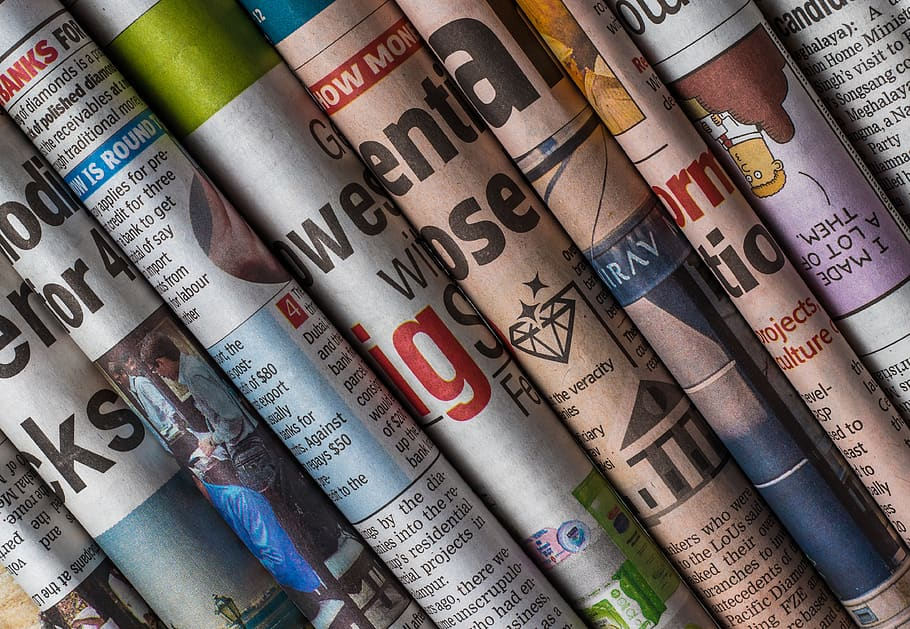

In [1]:
from IPython.display import Image
Image(filename='announcement-article-articles-copy-coverage.jpg', width=1000, height=10)

# News Articles

## Table of Contents

1. [Project Overview](#1.-Project-Overview)
2. [Importing Packages](#2.-Importing-Packages)
3. [Loading Data](#3.-Loading-Data)
4. [Data Cleaning and Filtering](#4.-Data-Cleaning-and-Filtering)
   - [Extracting just the domain from the url column](#4.1-Extracting-just-the-domain-from-the-url-column)
   - [Removing url from Headlines, Description and Content](#4.2-Removing-url-from-Headlines,-Description-and-Content)
   - [Checking to make sure the text is a string, removing punctuaction and special characters and converting text to lower cases](#4.3-Checking-to-make-sure-the-text-is-a-string,-removing-punctuaction-and-special-characters-and-converting-text-to-lower-cases)
   - [Dividing text into a sequence of tokens 'Tokenisation'](#4.4-Dividing-text-into-a-sequence-of-tokens-'Tokenisation')
   - [Stemming ~ Transforming to the root word](#4.5-Stemming-~-Transforming-to-the-root-word)
   - [Lemmezation ~ Processing word to thier base or dictionary form for Healines, Description and content columns](#4.6-Lemmezation-~-Processing-word-to-their-base-or-dictionary-form-for-Headlines,-Description-and-content-columns)
   - [Stopwords](#4.7-Stopwords)
5. [Exploratory Data Analysis](#5.-Exploratory-Data-Analysis)
   - [Category Distribution](#5.1-Category-Distribution)
   - [Word Cloud per category](#5.2-Word-Cloud-per-category)
   - [Content Length Analysis per category](#5.3-Content-Length-Analysis-per-category)
6. [Model Training and Evaluation](#6.-Model-Training-and-Evaluation)
   - [Model Pipeline & Performance Metrics](#6.1.-Model-Pipeline-&-Performance-Metrics)
     - [Model Runtime comparison](#6.1.1-Model-Runtime-comparison)
     - [Model Performance Metrics comparison](#6.1.2-Model-Performance-Metrics-comparison)
   - [K-Fold Cross validation](#6.2-K-Fold-Cross-validation)
   - [Label classification](#6.3-Label-classification)
7. [Conclusion & Insights](#7.-Conclusion-&-Insights)
8. [References](#8.-References)

## 1. Project Overview

#### Project Overview ####

The goal of this project is to build a machine learning model that can automatically classify newspaper articles into predefined categories based on their textual content. This will help in organizing and retrieving news articles efficiently, improving user experience in news applications, and enabling automated content tagging.

#### Data Overview ####

The dataset contains the following key features:

Headline: The title of the news article.

Description: A brief summary or subheading of the article.

Content: The full text of the article.

URL: A link to the original article (optional for reference).

Category: The target variable representing the article’s classification (e.g., Politics, Sports, Technology, Business, Entertainment).

#### Project Objectives ####

1. Data Preprocessing & Exploration

- Clean and preprocess text data (remove stopwords, punctuation, stemming/lemmatization).
- Explore word frequencies, term distributions, and category imbalances.

2. Feature Engineering

- Convert text into numerical representations using techniques such as TF-IDF, word embeddings (Word2Vec, GloVe), or deep learning-based embeddings (BERT).

3. Model Development

- Train and compare different machine learning models such as Naïve Bayes, Logistic Regression, Random Forest, and deep learning models (LSTMs, Transformers).
  Optimize hyperparameters and fine-tune models for better accuracy.

4. Model Evaluation

- Use accuracy, precision, recall, F1-score, and confusion matrices to assess model performance.
- Perform cross-validation to ensure robustness.

5. Application 

- Build an API or a web application to classify new articles in real-time.

#### Expected Outcomes ####

A trained and validated classification model that accurately predicts article categories.
Insights into key features that distinguish different categories.
Potential application in news aggregation platforms or automated tagging systems.

## 2. Importing Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mlflow
import mlflow.sklearn
import time
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score
from wordcloud import WordCloud
from sklearn.ensemble import StackingRegressor
from IPython.display import Image
import nltk
%matplotlib inline
import re
import os
import string
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords
import pickle

## 3. Loading Data

In [3]:
train_data = pd.read_csv('train.csv')
train_data.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [4]:
test_data = pd.read_csv('test.csv')
test_data.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


## 4. Data Cleaning and Filtering

In [5]:
df_train_copy=train_data.copy()
df_test_copy=test_data.copy()

In [6]:
df_copy = df_train_copy
df_copy1 = df_test_copy

In [7]:
df_copy.columns.tolist()

['headlines', 'description', 'content', 'url', 'category']

In [8]:
column_name = 'your_column_name'  # Replace with the actual name of your column
category_types = list(df_copy['category'].unique())
print(category_types)

['business', 'sports', 'entertainment', 'education', 'technology']


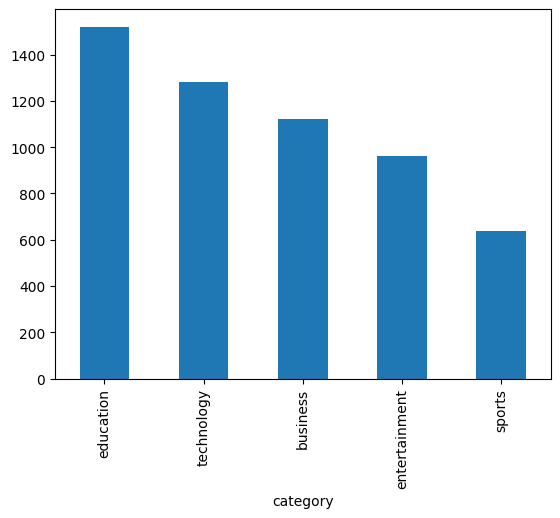

In [9]:
# Visualise the distribution of train.csv for the categories
df_copy['category'].value_counts().plot(kind = 'bar')
plt.show()

### 4.1 Extracting just the domain from the url column

In [10]:
def extract_domain(url):
    if isinstance(url, str):
        try:
            from urllib.parse import urlparse
            return urlparse(url).netloc
        except:
            return None
    return None

df_copy['url'] = df_copy['url'].apply(extract_domain)
df_copy1['url'] = df_copy1['url'].apply(extract_domain)

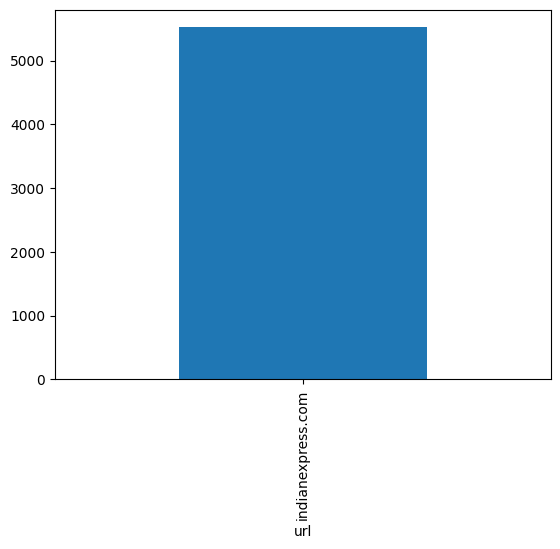

In [11]:
# Visualise the distribution of train.csv for the categories
df_copy['url'].value_counts().plot(kind = 'bar')
plt.show()

### 4.2 Removing url from Headlines, Description and Content

In [12]:

pattern_url = r'http[s]?://(?:[A-Za-z0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'  # Corrected regex (see below)
subs_url = r'url-web'

# Apply the replacement to specific columns
columns_to_replace = ['headlines', 'description', 'content']

for col in columns_to_replace:
    df_copy[col] = df_copy[col].astype(str).replace(to_replace=pattern_url, value=subs_url, regex=True)
    df_copy1[col] = df_copy1[col].astype(str).replace(to_replace=pattern_url, value=subs_url, regex=True)


In [13]:
df_copy.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,indianexpress.com,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,indianexpress.com,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,indianexpress.com,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,indianexpress.com,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,indianexpress.com,business


In [14]:
df_copy1.head()

,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,indianexpress.com,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,indianexpress.com,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",indianexpress.com,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",indianexpress.com,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,indianexpress.com,business


### 4.3 Checking to make sure the text is a string, removing punctuaction and special characters and converting text to lower cases

In [15]:
def clean_text(text):
    if isinstance(text, str): 
        text = re.sub(r'[^\w\s]', '', text, re.UNICODE)  
        text = text.lower() 
        return text
    return text

df_copy['headlines'] = df_copy['headlines'].apply(clean_text)
df_copy['description'] = df_copy['description'].apply(clean_text)
df_copy['content'] = df_copy['content'].apply(clean_text)

df_copy1['headlines'] = df_copy1['headlines'].apply(clean_text)
df_copy1['description'] = df_copy1['description'].apply(clean_text)
df_copy1['content'] = df_copy1['content'].apply(clean_text)

C:\Users\kenny\AppData\Local\Temp\ipykernel_4676\1934955315.py:3: DeprecationWarning: 'count' is passed as positional argument
  text = re.sub(r'[^\w\s]', '', text, re.UNICODE)


In [16]:
df_copy['description'].iloc[4556]

'darpas x65 aircraft features a revolutionary design that will be used to test a new air control system that could change an entire centurys worth of aircraft design paradigms'

In [17]:
df_copy1['description'].iloc[10]

'actor konkona sensharma recalled how embarrassed she was early in her career about doing a sensational film about a teenager stalking an older man'

### 4.4 Dividing text into a sequence of tokens 'Tokenisation'

In [18]:
# Tokenise the text using the TreebankWordTokenizer
tokeniser = TreebankWordTokenizer()
df_copy['tokens_Headlines'] = df_copy['headlines'].apply(tokeniser.tokenize)
df_copy['tokens_description'] = df_copy['description'].apply(tokeniser.tokenize)
df_copy['tokens_content'] = df_copy['content'].apply(tokeniser.tokenize)

df_copy1['tokens_Headlines'] = df_copy1['headlines'].apply(tokeniser.tokenize)
df_copy1['tokens_description'] = df_copy1['description'].apply(tokeniser.tokenize)
df_copy1['tokens_content'] = df_copy1['content'].apply(tokeniser.tokenize)

In [19]:
df_copy['tokens_Headlines'].iloc[45]

['beyond',
 'mccain',
 'and',
 'tim',
 'hortons',
 'canadian',
 'investments',
 'in',
 'india',
 'span',
 'infra',
 'to',
 'fintech']

In [20]:
df_copy['tokens_description'].iloc[45]

['indian',
 'companies',
 'in',
 'canada',
 'are',
 'active',
 'in',
 'sectors',
 'like',
 'information',
 'technology',
 'software',
 'steel',
 'natural',
 'resources',
 'and',
 'banking']

In [21]:
df_copy['tokens_content'].iloc[45]

['while',
 'tim',
 'hortons',
 'and',
 'mccain',
 'foods',
 'might',
 'have',
 'the',
 'biggest',
 'brand',
 'recall',
 'when',
 'it',
 'comes',
 'to',
 'canadian',
 'businesses',
 'in',
 'india',
 'canadian',
 'investments',
 'in',
 'the',
 'country',
 'go',
 'far',
 'beyond',
 'coffee',
 'chains',
 'and',
 'frozen',
 'snacks',
 'canadian',
 'pension',
 'funds',
 'asset',
 'management',
 'companies',
 'and',
 'financial',
 'services',
 'and',
 'insurance',
 'players',
 'are',
 'invested',
 'in',
 'key',
 'sectors',
 'of',
 'indias',
 'economy',
 'including',
 'financial',
 'services',
 'financial',
 'technology',
 'infrastructure',
 'real',
 'estate',
 'information',
 'technology',
 'and',
 'energy',
 'among',
 'others',
 'according',
 'to',
 'the',
 'national',
 'investment',
 'promotion',
 'facilitation',
 'agency',
 'or',
 'invest',
 'india',
 'canada',
 'is',
 'the',
 '18thlargest',
 'foreign',
 'investor',
 'in',
 'india',
 'with',
 'a',
 'cumulative',
 'investment',
 'of',
 '331

### 4.5 Stemming ~ Transforming to the root word

In [22]:
stemmer = PorterStemmer()

def df_copy_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]  

# 2. Use the created stemmer object in the apply function:
df_copy['stem_token_healines'] = df_copy['tokens_Headlines'].apply(df_copy_stemmer, args=(stemmer,))
df_copy['stem_token_description'] = df_copy['tokens_description'].apply(df_copy_stemmer, args=(stemmer,))
df_copy['stem_token_content'] = df_copy['tokens_content'].apply(df_copy_stemmer, args=(stemmer,))

df_copy1['stem_token_healines'] = df_copy1['tokens_Headlines'].apply(df_copy_stemmer, args=(stemmer,))
df_copy1['stem_token_description'] = df_copy1['tokens_description'].apply(df_copy_stemmer, args=(stemmer,))
df_copy1['stem_token_content'] = df_copy1['tokens_content'].apply(df_copy_stemmer, args=(stemmer,))

In [23]:
for i, t in enumerate(df_copy.iloc[3456]['tokens_Headlines']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[3456]['stem_token_healines'][i]))

next                 --> next      
nmc                  --> nmc       
took                 --> took      
6500                 --> 6500      
comments             --> comment   
into                 --> into      
consideration        --> consider  
during               --> dure      
consultation         --> consult   
process              --> process   
says                 --> say       
health               --> health    
minister             --> minist    


In [24]:
for i, t in enumerate(df_copy.iloc[3456]['tokens_description']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[3456]['stem_token_description'][i]))

the                  --> the       
next                 --> next      
will                 --> will      
be                   --> be        
a                    --> a         
computerbased        --> computerbas
examination          --> examin    
based                --> base      
on                   --> on        
highquality          --> highqual  
multiplechoice       --> multiplechoic
questions            --> question  
mcq                  --> mcq       
focused              --> focus     
on                   --> on        
addressing           --> address   
higher               --> higher    
domains              --> domain    
of                   --> of        
knowledge            --> knowledg  
aligned              --> align     
to                   --> to        
competencies         --> compet    
expected             --> expect    
of                   --> of        
a                    --> a         
medical              --> medic     
graduate             -->

In [25]:
for i, t in enumerate(df_copy.iloc[3456]['tokens_content']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[3456]['stem_token_content'][i]))

the                  --> the       
national             --> nation    
exit                 --> exit      
test                 --> test      
next                 --> next      
regulations          --> regul     
were                 --> were      
framed               --> frame     
by                   --> by        
the                  --> the       
national             --> nation    
medical              --> medic     
commission           --> commiss   
nmc                  --> nmc       
after                --> after     
taking               --> take      
into                 --> into      
consideration        --> consider  
nearly               --> nearli    
6500                 --> 6500      
comments             --> comment   
received             --> receiv    
during               --> dure      
the                  --> the       
consultation         --> consult   
process              --> process   
union                --> union     
health               --> hea

### 4.6 Lemmezation ~ Processing word to thier base or dictionary form  for Healines, Description and content columns

In [26]:
lemmatizer = WordNetLemmatizer()

def df_copy_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words] 

In [27]:
df_copy['lemma_tokens_Headlines'] = df_copy['tokens_Headlines'].apply(df_copy_lemma, args=(lemmatizer, ))
df_copy['lemma_tokens_description'] = df_copy['tokens_description'].apply(df_copy_lemma, args=(lemmatizer, ))
df_copy['lemma_tokens_content'] = df_copy['tokens_content'].apply(df_copy_lemma, args=(lemmatizer, ))

df_copy1['lemma_tokens_Headlines'] = df_copy1['tokens_Headlines'].apply(df_copy_lemma, args=(lemmatizer, ))
df_copy1['lemma_tokens_description'] = df_copy1['tokens_description'].apply(df_copy_lemma, args=(lemmatizer, ))
df_copy1['lemma_tokens_content'] = df_copy1['tokens_content'].apply(df_copy_lemma, args=(lemmatizer, ))

In [28]:
for i, t in enumerate(df_copy.iloc[280]['tokens_Headlines']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[280]['lemma_tokens_Headlines'][i]))

no                   --> no        
proposal             --> proposal  
to                   --> to        
provide              --> provide   
duty                 --> duty      
concession           --> concession
on                   --> on        
import               --> import    
of                   --> of        
evs                  --> ev        
govt                 --> govt      


In [29]:
for i, t in enumerate(df_copy.iloc[280]['tokens_description']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[280]['lemma_tokens_description'][i]))

at                   --> at        
present              --> present   
cars                 --> car       
imported             --> imported  
as                   --> a         
completely           --> completely
built                --> built     
units                --> unit      
cbus                 --> cbus      
attract              --> attract   
customs              --> custom    
duty                 --> duty      
ranging              --> ranging   
from                 --> from      
60                   --> 60        
per                  --> per       
cent                 --> cent      
to                   --> to        
100                  --> 100       
per                  --> per       
cent                 --> cent      
depending            --> depending 
on                   --> on        
engine               --> engine    
size                 --> size      
and                  --> and       
cost                 --> cost      
insurance            --> ins

In [30]:
for i, t in enumerate(df_copy.iloc[280]['tokens_content']):    
    print ('{:20s} --> {:10s}'.format(t, df_copy.iloc[280]['lemma_tokens_content'][i]))

the                  --> the       
government           --> government
on                   --> on        
wednesday            --> wednesday 
said                 --> said      
it                   --> it        
is                   --> is        
not                  --> not       
considering          --> considering
any                  --> any       
proposal             --> proposal  
to                   --> to        
provide              --> provide   
duty                 --> duty      
concessions          --> concession
and                  --> and       
exemption            --> exemption 
from                 --> from      
local                --> local     
value                --> value     
addition             --> addition  
for                  --> for       
import               --> import    
of                   --> of        
electric             --> electric  
vehicles             --> vehicle   
into                 --> into      
the                  --> th

### 4.7 Stopwords

In [31]:
from nltk.corpus import stopwords
nltk.download('stopwords', quiet=True)  # Download stopwords if you haven't already
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        words = [word for word in words if word not in stop_words]
        return " ".join(words)
    return text

df_copy['content'] = df_copy['content'].apply(remove_stopwords) 
df_copy['description'] = df_copy['description'].apply(remove_stopwords)
df_copy['headlines'] = df_copy['headlines'].apply(remove_stopwords)

df_copy1['content'] = df_copy1['content'].apply(remove_stopwords) 
df_copy1['description'] = df_copy1['description'].apply(remove_stopwords)
df_copy1['headlines'] = df_copy1['headlines'].apply(remove_stopwords)

In [32]:
def remove_punctuation(text):
    if isinstance(text, str):
        return text.translate(str.maketrans('', '', string.punctuation))
    return text

# Remove punctuation from all columns except those containing 'token'
for col in df_copy.columns:
    if 'token' not in col.lower():
        df_copy[col] = df_copy[col].apply(remove_punctuation)

# Remove punctuation from all columns except those containing 'token'
for col in df_copy1.columns:
    if 'token' not in col.lower():
        df_copy1[col] = df_copy1[col].apply(remove_punctuation)


In [33]:
# Drop columns containing 'token'
df_copy = df_copy.loc[:, ~df_copy.columns.str.contains('token', case=False)]
df_copy1 = df_copy1.loc[:, ~df_copy1.columns.str.contains('token', case=False)]

In [34]:
df_copy.head()

,headlines,description,content,url,category
0,rbi revises definition politicallyexposed pers...,central bank also asked chairpersons chief exe...,reserve bank india rbi changed definition poli...,indianexpresscom,business
1,ndtv q2 net profit falls 574 rs 555 crore impa...,ndtvs consolidated revenue operations rs 9555 ...,broadcaster new delhi television ltd monday re...,indianexpresscom,business
2,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technologies ind...,indianexpresscom,business
3,indias current account deficit declines sharpl...,current account deficit cad 38 per cent gdp us...,indias current account deficit declined sharpl...,indianexpresscom,business
4,states borrowing cost soars 768 highest far fi...,prices shot reflecting overall higher risk ave...,states forced pay nose weekly auction debt tue...,indianexpresscom,business


In [35]:
df_copy1.head()

,headlines,description,content,url,category
0,nlc india wins contract power supply rajasthan...,stateowned firm nlc india ltd nlcil monday sai...,stateowned firm nlc india ltd nlcil monday sai...,indianexpresscom,business
1,sbi clerk prelims exams dates announced admit ...,sbi clerk prelims exam sbi clerk prelims exam ...,sbi clerk prelims exam state bank indian sbi a...,indianexpresscom,education
2,golden globes michelle yeoh ferrell angela bas...,barbie top nominee year followed closely oppen...,michelle yeoh ferrell angela bassett amanda se...,indianexpresscom,entertainment
3,oneplus nord 3 rs 27999 part new price cut heres,new deal makes oneplus nord 3 easy purchase rs...,review oneplus nord 3 5g praised balanced comb...,indianexpresscom,technology
4,adani familys partners used opaque funds inves...,citing review files multiple tax havens intern...,millions dollars invested publicly traded stoc...,indianexpresscom,business


In [36]:
df_copy.to_csv('cleaned_train_data.csv', index=False)
df_copy1.to_csv('cleaned_test_data.csv', index=False)

In [37]:
df_copy.shape

(5520, 5)

In [38]:
df_copy1.shape

(2000, 5)

## 5. Exploratory Data Analysis

### 5.1 Category Distribution

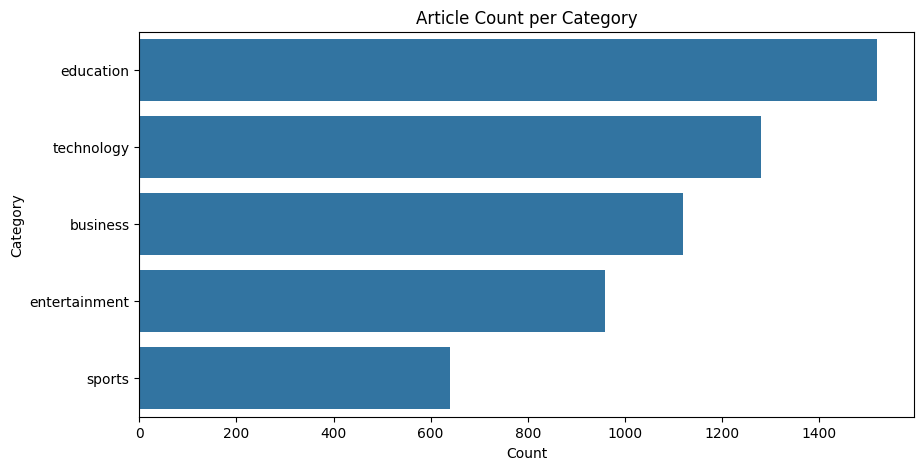

In [39]:
# Category Distribution (Count the number of articles per category)

plt.figure(figsize = (10, 5))
sns.countplot(data = train_data, y = 'category', order = train_data['category'].value_counts().index)
plt.title("Article Count per Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

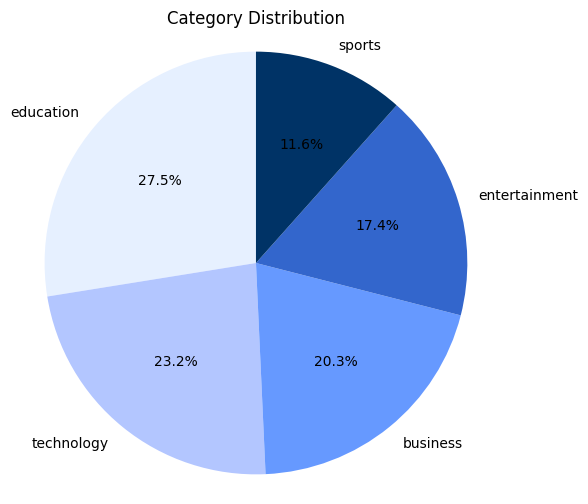

In [40]:
# pie chart showing percentages of each category

# Count the occurrences of each category
category_counts = train_data['category'].value_counts()

# Create the pie chart
plt.figure(figsize = (6, 6))
plt.pie(category_counts, labels = category_counts.index, autopct = '%1.1f%%', startangle=90, colors = ['#e6f0ff', '#b3c6ff', '#6699ff', '#3366cc', '#003366'])
plt.axis('equal')
plt.title('Category Distribution')
plt.show()

Education has the highest number of articles, with a count exceeding 1400, making it the dominant category.
Technology comes second with over 1200 articles.
Business is third, with slightly above 1000 articles.
Entertainment follows with fewer than 1000 articles but still a significant count.
Sports has the lowest count, with fewer than 800 articles.
There is an uneven distribution of articles, with education being the most covered topic and sports the least.
The difference between the highest and lowest categories is substantial, indicating a bias or focus on education-related articles in the dataset.

In [41]:
# Most common words per category

# Loop through each category and generate a word cloud

categories = train_data['category'].unique()

### 5.2 Word Cloud per category

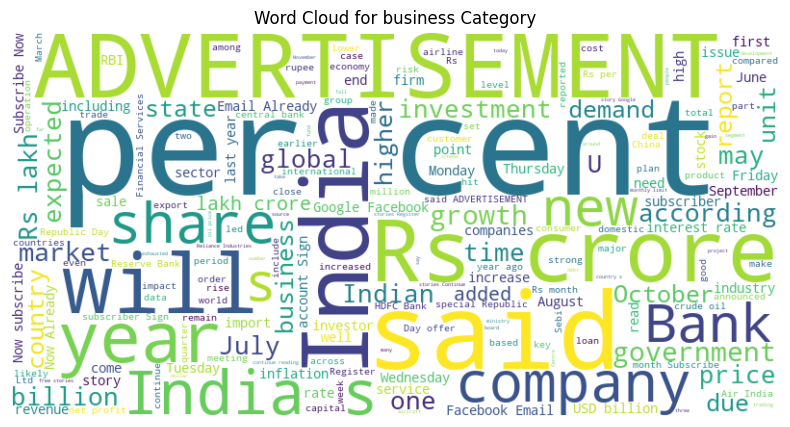

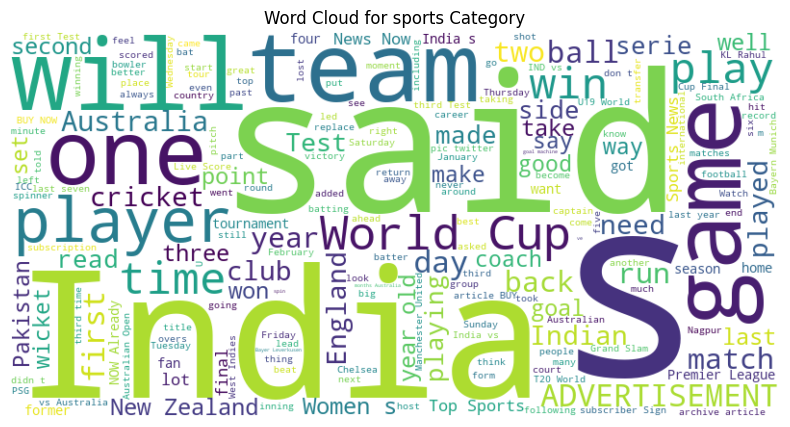

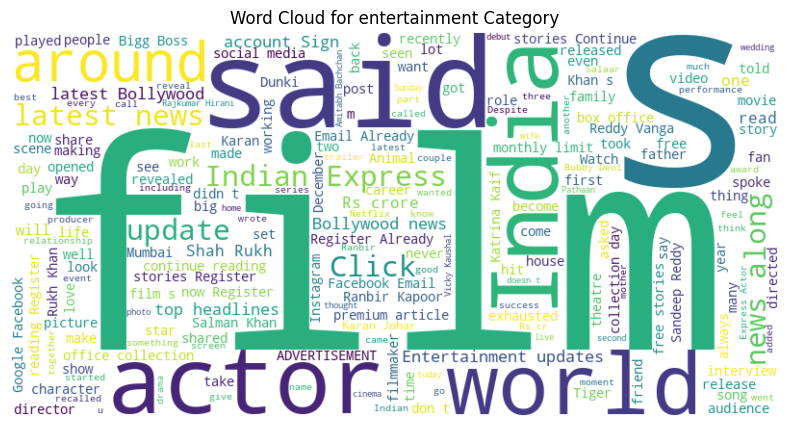

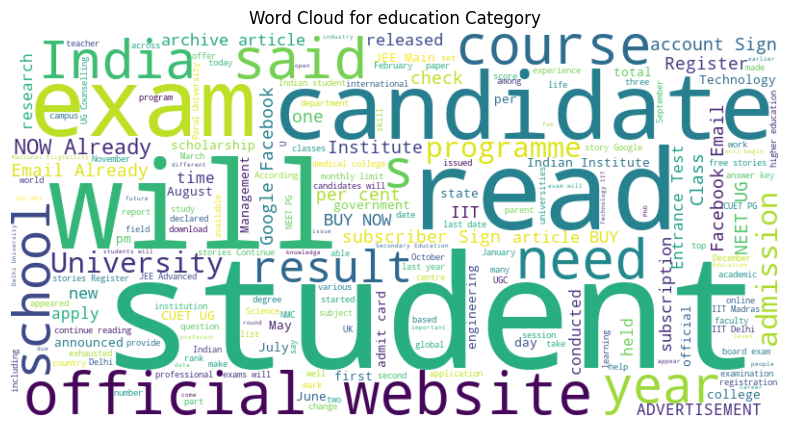

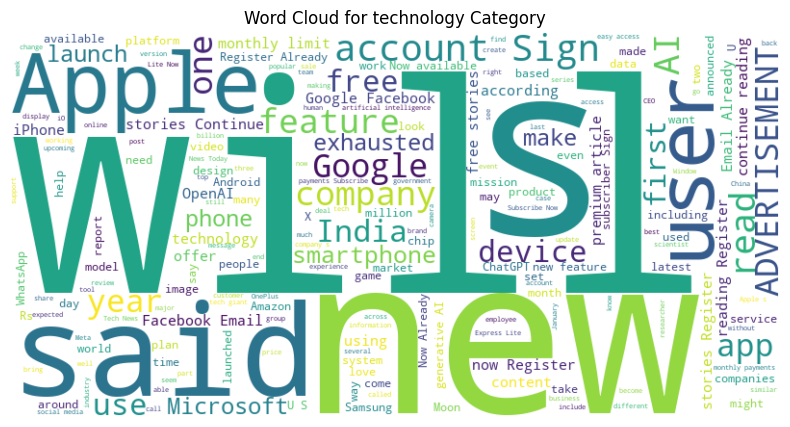

In [42]:
# Create a word cloud for each category

for category in categories:
    
    # Filter the data for the current category
    category_data = train_data[train_data['category'] == category]
    
    # Combine all text (headline, description, and content) into one string
    text = ' '.join(category_data['headlines']) + ' ' + ' '.join(category_data['description']) + ' ' + ' '.join(category_data['content'])
    
    # Create the word cloud
    wordcloud = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize = (10, 5))
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {category} Category')
    plt.show()

Business:
Prominent words include "percent," "advertisement," "crore," "year," "said," "India," "government," "company," "market," "investment," "growth," "billion," "lakh," "global," "report," "service," "subscriber," "inflation," "revenue," "shares," "business," "time," "rate," "import," "export," "USD," "RBI," "financial services," "industry," and more.
This indicates a focus on economics, regions and business activities.

Sports:
Dominant words include "team," "India," "game," "match," "player," "score," and "Cup".
These words reflect a strong focus on events, matches, teams, and players, as expected for sports-related articles.
Specific terms like "wicket," "run," "cricket," and "World Cup" suggest that cricket is a significant theme.

Entertainment:
Prominent words include "film," "actor," "movie," "entertainment," "Bollywood," and "song."
This indicates a focus on the film and music industries, likely dominated by updates, reviews, and celebrity news.
Words like "release," "trailer," and "star" further emphasize the focus on cinema and celebrity culture.

Education:
Key terms include "student," "exam," "result," "admission," "school," and "university."
The words reflect topics related to academic exams, admissions, results, and education systems.
Specific mentions like "candidate," "check," and "official website" suggest a practical focus, likely including resources and instructions for students.

Technology:
Frequently appearing words include "new," "device," "feature," "app," "phone," "update," and "software."
These words indicate a focus on product launches, software updates, and new technologies.
The presence of "advertisement" might suggest that tech articles include a lot of promotional content.


The word clouds align well with the expected themes of each category, making them useful for validating the dataset's content distribution.
Repeated use of words like "India" and "said" across categories might suggest either regional focus or common reporting language.
The specific nature of terms in each word cloud highlights the unique vocabulary of each category, which could aid in text classification tasks.

### 5.3 Content Length Analysis per category

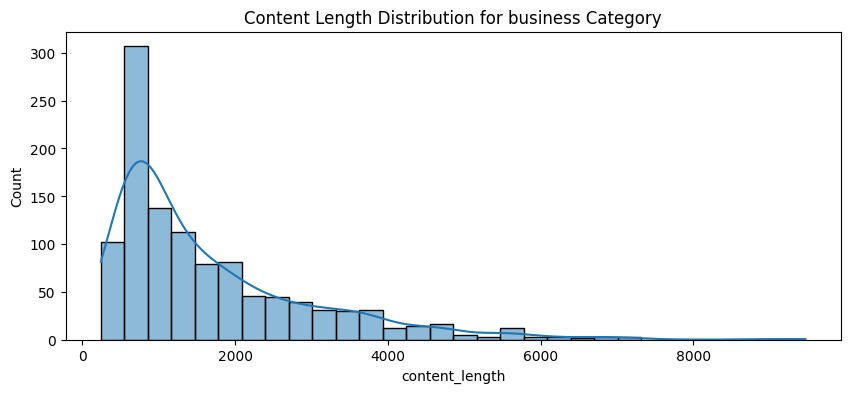

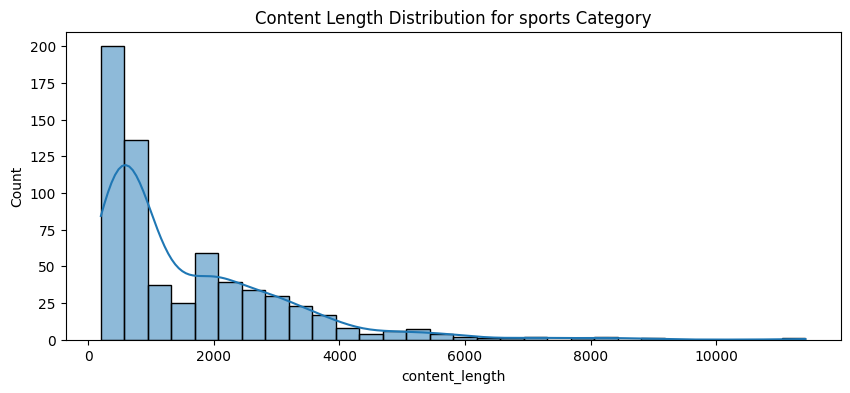

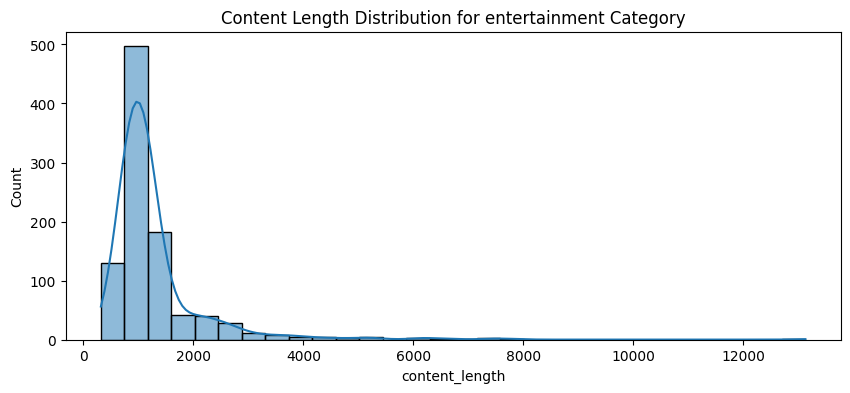

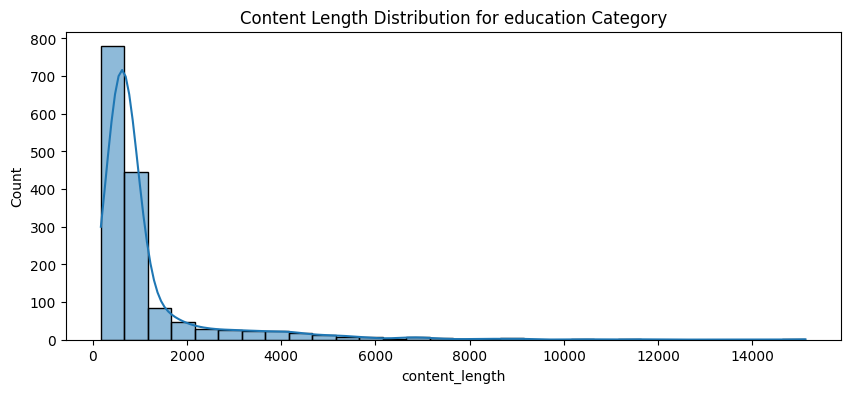

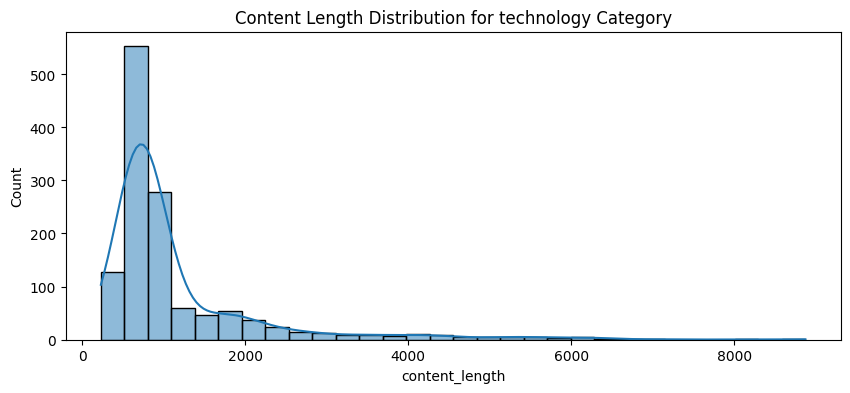

In [43]:
# Content length analysis per category

for category in categories:
    
    # Filter the data for the current category
    category_data = train_data[train_data['category'] == category].copy() 
    
    # Add the content length column
    category_data['content_length'] = category_data['content'].astype(str).apply(len)
    
    # Create a histogram of the headline length
    plt.figure(figsize=(10, 4))
    sns.histplot(category_data['content_length'], bins=30, kde=True)
    plt.title(f"Content Length Distribution for {category} Category")
    plt.show()

Each category exhibits a right-skewed distribution, meaning most articles have relatively shorter content lengths, with a few articles having significantly longer lengths.
The distributions suggest that shorter articles dominate all categories.

Business:
Most articles fall within a content length of 0–2000 words, with a rapid drop-off as the length increases.
A small number of articles have content lengths exceeding 6000 words.


Sports: 
The distribution is heavily concentrated below 2000 words.
Compared to other categories, this has fewer articles with longer content lengths, suggesting shorter content is typical for sports articles.


Entertainment:
Similar to sports, most articles are below 2000 words, but the tail extends slightly longer (up to 10,000+ words).
This category has a moderate presence of articles with longer content lengths.


Education:
The highest concentration is still in the 0–2000 range, but this category shows a more gradual decline compared to others.
A significant number of articles have content lengths exceeding 8000 words, making education the category with the longest articles on average.


Technology:
Most articles are also below 2000 words, but the distribution has a slightly longer tail than sports or business.
Articles exceeding 5000 words are present, but they are fewer compared to education.

## 6. Model Training and Evaluation

For this section of the project, we will be building a pipeline of 5 classification models using MLflow. The models we chose are:
- Logistic Regression
- Decision Tree
- Random Forest
- Support Vector Machine (kernel = Radial Basis Function (RBF))
- Naive Baiyes

We will be comparing these 5 models using different performance metrics (i.e Accuracy, Precision, Recall & F1 Score). We will also be comparing the runtimes of each model to see which models are efficient in terms of using computational resources. We will also use some cross-validation to see which models perform best.

### 6.1 Model Pipeline & Performance Metrics

In [44]:
# Load the cleaned training and test datasets
df_train = pd.read_csv('cleaned_train_data.csv')
df_test = pd.read_csv('cleaned_test_data.csv')

In [45]:
# Text columns to be used as separate features
text_columns = ['headlines', 'description', 'content', 'url']

# Encode target variable
label_encoder = LabelEncoder()
df_train['category'] = label_encoder.fit_transform(df_train['category'])
df_test['category'] = label_encoder.transform(df_test['category'])

X_train, y_train = df_train[text_columns], df_train['category']
X_test, y_test = df_test[text_columns], df_test['category']

# Define TF-IDF transformation for each text column
preprocessor = ColumnTransformer([
    (col, TfidfVectorizer(), col) for col in text_columns
])

In [46]:
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Naive Bayes": MultinomialNB()
}

In [47]:
# Initialize MLflow
mlflow.set_experiment("Text Classification")

# Store runtime and performance metrics for each model
model_runtimes = {}
model_f1_scores = {}
model_precisions = {}
model_recalls = {}
model_accuracies = {}

# Train and evaluate models
for name, model in models.items():
    with mlflow.start_run(run_name=name):
        start_time = time.time()
        
        # Create pipeline
        pipeline = make_pipeline(preprocessor, model)
        
        # Train model
        pipeline.fit(X_train, y_train)
        
        # Make predictions
        y_pred = pipeline.predict(X_test)
        
        # Compute metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Compute confusion matrix and classification report
        conf_matrix = confusion_matrix(y_test, y_pred)
        class_report = classification_report(y_test, y_pred)
        
        end_time = time.time()
        runtime = end_time - start_time
        model_runtimes[name] = runtime
        model_f1_scores[name] = f1
        model_precisions[name] = precision
        model_recalls[name] = recall
        model_accuracies[name] = accuracy
        
        # Log parameters and metrics
        mlflow.log_param("model", name)
        mlflow.sklearn.log_model(pipeline, "model")  # This saves the trained model
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("runtime", runtime)
        
        # Log model
        #mlflow.sklearn.log_model(pipeline, name)
        
        print(f"Confusion Matrix for {name}:\n{conf_matrix}\n")
        print(f"Classification Report for {name}:\n{class_report}\n")
        print(f"{name} Runtime: {runtime:.4f} seconds\n")

        # --- Save the pipeline to a pickle file ---
        filename = f"{name.lower().replace(' ', '_')}_pipeline.pkl"
        with open(filename, 'wb') as file:
            pickle.dump(pipeline, file)
        print(f"{name} pipeline saved to {filename}")


        # --- Save the preprocessor ---
        if name == list(models.keys())[0]: # only save once
            with open('tfidf_vectorizer.pkl', 'wb') as file:
                pickle.dump(preprocessor, file)
            print("TF-IDF vectorizer saved to tfidf_vectorizer.pkl")

            with open('label_encoder.pkl', 'wb') as file:
                pickle.dump(label_encoder, file)
            print("Label encoder saved to label_encoder.pkl")


2025/02/15 17:31:56 INFO mlflow.tracking.fluent: Experiment with name 'Text Classification' does not exist. Creating a new experiment.
2025/02/15 17:32:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion Matrix for Logistic Regression:
[[385   0   1   0  14]
 [  3 392   0   0   5]
 [  1   0 395   1   3]
 [  0   0   1 394   5]
 [  8   0   0   2 390]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       400
           1       1.00      0.98      0.99       400
           2       0.99      0.99      0.99       400
           3       0.99      0.98      0.99       400
           4       0.94      0.97      0.95       400

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000


Logistic Regression Runtime: 4.0882 seconds

Logistic Regression pipeline saved to logistic_regression_pipeline.pkl
TF-IDF vectorizer saved to tfidf_vectorizer.pkl
Label encoder saved to label_encoder.pkl


2025/02/15 17:32:18 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion Matrix for Decision Tree:
[[345  12   3   8  32]
 [ 10 377   1   7   5]
 [  6   1 371   4  18]
 [ 17  10   3 323  47]
 [ 33  18   8  11 330]]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       400
           1       0.90      0.94      0.92       400
           2       0.96      0.93      0.94       400
           3       0.92      0.81      0.86       400
           4       0.76      0.82      0.79       400

    accuracy                           0.87      2000
   macro avg       0.88      0.87      0.87      2000
weighted avg       0.88      0.87      0.87      2000


Decision Tree Runtime: 5.0620 seconds

Decision Tree pipeline saved to decision_tree_pipeline.pkl


2025/02/15 17:32:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion Matrix for Random Forest:
[[377   5   1   0  17]
 [  4 392   0   1   3]
 [  0   1 375   1  23]
 [  3  10   0 369  18]
 [ 12   1   0   2 385]]

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       400
           1       0.96      0.98      0.97       400
           2       1.00      0.94      0.97       400
           3       0.99      0.92      0.95       400
           4       0.86      0.96      0.91       400

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000


Random Forest Runtime: 11.1939 seconds

Random Forest pipeline saved to random_forest_pipeline.pkl


2025/02/15 17:33:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion Matrix for SVM (RBF):
[[382   0   1   0  17]
 [  2 392   0   0   6]
 [  0   0 395   1   4]
 [  0   0   0 393   7]
 [  7   0   0   2 391]]

Classification Report for SVM (RBF):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       400
           1       1.00      0.98      0.99       400
           2       1.00      0.99      0.99       400
           3       0.99      0.98      0.99       400
           4       0.92      0.98      0.95       400

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000


SVM (RBF) Runtime: 59.0538 seconds

SVM (RBF) pipeline saved to svm_(rbf)_pipeline.pkl


2025/02/15 17:33:43 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion Matrix for Naive Bayes:
[[382   2   1   0  15]
 [  1 396   0   0   3]
 [  0   0 396   1   3]
 [  0   9   9 374   8]
 [ 11   4   1   1 383]]

Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       400
           1       0.96      0.99      0.98       400
           2       0.97      0.99      0.98       400
           3       0.99      0.94      0.96       400
           4       0.93      0.96      0.94       400

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000


Naive Bayes Runtime: 1.1164 seconds

Naive Bayes pipeline saved to naive_bayes_pipeline.pkl


We built a model pipeline with MLflow for 5 different classification models above. The above output shows the confusion matrix and classification report for each classification model. We will dissect the performance of these models in the sections below.

In [48]:
# Labels of the models
label_mapping = dict(enumerate(label_encoder.classes_))
print(label_mapping)

{0: 'business', 1: 'education', 2: 'entertainment', 3: 'sports', 4: 'technology'}


#### 6.1.1 Model Runtime comparison

In [49]:
# Function to add value labels on bars
def add_value_labels(ax):
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=10, color='black')

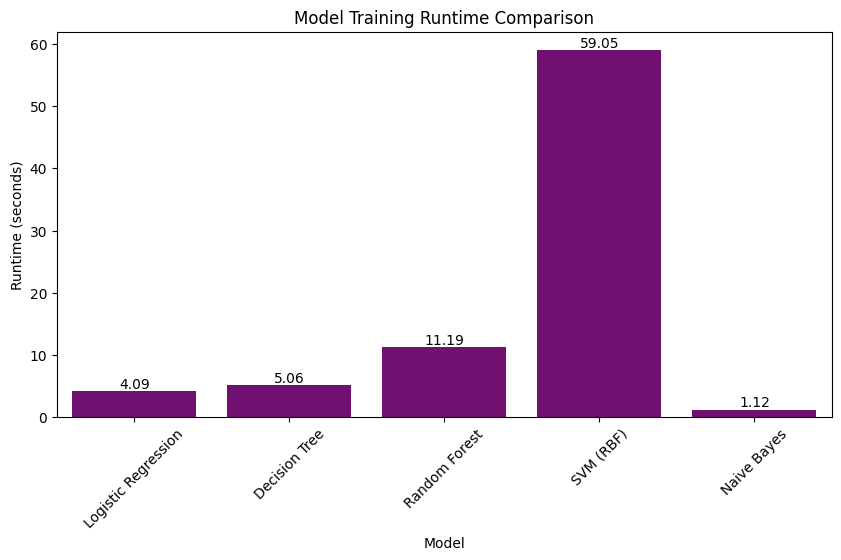

In [50]:
# Plot runtime comparison
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=list(model_runtimes.keys()), y=list(model_runtimes.values()), color="purple")
plt.xlabel("Model")
plt.ylabel("Runtime (seconds)")
plt.title("Model Training Runtime Comparison")
plt.xticks(rotation=45)
add_value_labels(ax)
plt.show()

We compare the runtimes for each classification model in the plot above. The Naive Bayes model has the fastest run time while the Support Vector Machine model has the the slowest run time. The Logistic Regression and Decision Tree models have similar run times. Out of all the models, the Naives Bayes model performed the best in terms of run time (0.92s) and the Support Vector Machine model has the the worst run time (52.27s).

#### 6.1.2 Model Performance Metrics comparison 

C:\Users\kenny\AppData\Local\Temp\ipykernel_4676\2774097443.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(model_f1_scores.keys(), rotation=45)
C:\Users\kenny\AppData\Local\Temp\ipykernel_4676\2774097443.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(model_precisions.keys(), rotation=45)
C:\Users\kenny\AppData\Local\Temp\ipykernel_4676\2774097443.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[2].set_xticklabels(model_recalls.keys(), rotation=45)
C:\Users\kenny\AppData\Local\Temp\ipykernel_4676\2774097443.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[3].set_xticklabels(model_a

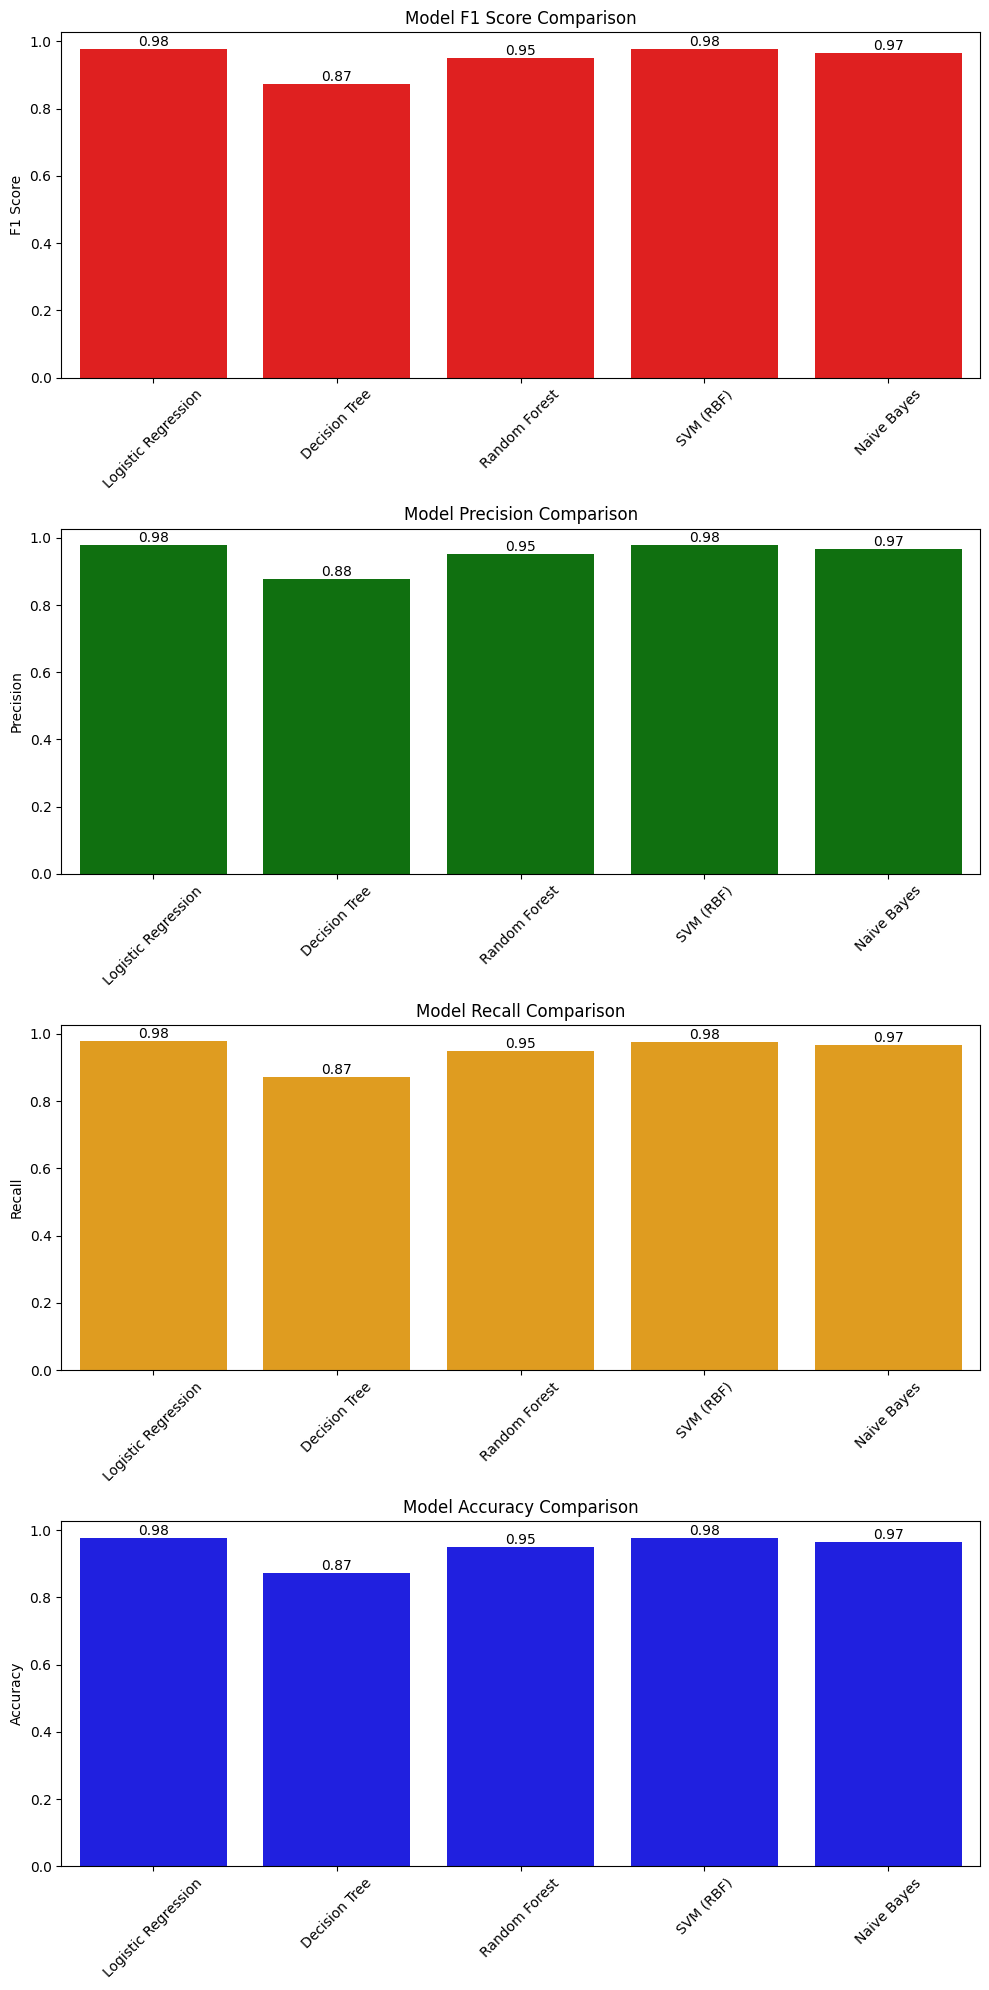

In [51]:
# Plot F1-score, Precision, Recall & Accuracy as subplots
fig, axes = plt.subplots(4, 1, figsize=(10, 20))

sns.barplot(ax=axes[0], x=list(model_f1_scores.keys()), y=list(model_f1_scores.values()), color="red")
axes[0].set_title("Model F1 Score Comparison")
axes[0].set_ylabel("F1 Score")
axes[0].set_xticklabels(model_f1_scores.keys(), rotation=45)
add_value_labels(axes[0])

sns.barplot(ax=axes[1], x=list(model_precisions.keys()), y=list(model_precisions.values()), color="green")
axes[1].set_title("Model Precision Comparison")
axes[1].set_ylabel("Precision")
axes[1].set_xticklabels(model_precisions.keys(), rotation=45)
add_value_labels(axes[1])

sns.barplot(ax=axes[2], x=list(model_recalls.keys()), y=list(model_recalls.values()), color="orange")
axes[2].set_title("Model Recall Comparison")
axes[2].set_ylabel("Recall")
axes[2].set_xticklabels(model_recalls.keys(), rotation=45)
add_value_labels(axes[2])

sns.barplot(ax=axes[3], x=list(model_accuracies.keys()), y=list(model_accuracies.values()), color="blue")
axes[3].set_title("Model Accuracy Comparison")
axes[3].set_ylabel("Accuracy")
axes[3].set_xticklabels(model_accuracies.keys(), rotation=45)
add_value_labels(axes[3])

plt.tight_layout()
plt.savefig('performance_metrics.jpg')
plt.show()

We compare the different performance metrics (F1 Score, Precision, Recall & Accuracy) for each classification model in the plot above. The Logistic Regression and the Support Vector Machine (RBF) performed the best across all metrics (F1 Score, Precision, Recall, and Accuracy) with scores around 0.98. The Decision Tree had the lowest performance in all metrics, scoring around 0.88.

### 6.2 K-Fold Cross validation 

In [52]:
# Define features and target
text_columns = ['headlines', 'description', 'content', 'url']
X = df_train[text_columns].astype(str).agg(' '.join, axis=1)
y = df_train['category']

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM (RBF)": SVC(kernel='rbf'),
    "Naive Bayes": MultinomialNB()
}

# Set up cross-validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [53]:
# Initialize MLflow experiment
mlflow.set_experiment("Text Classification - Cross Validation")

# Perform cross-validation
for name, model in models.items():
    with mlflow.start_run(run_name=f"CrossVal_{name}"):
        start_time = time.time()
        
        # Create pipeline
        pipeline = make_pipeline(TfidfVectorizer(), model)
        
        # Perform cross-validation
        accuracy = cross_val_score(pipeline, X, y, cv=kf, scoring='accuracy').mean()
        precision = cross_val_score(pipeline, X, y, cv=kf, scoring='precision_weighted').mean()
        recall = cross_val_score(pipeline, X, y, cv=kf, scoring='recall_weighted').mean()
        f1 = cross_val_score(pipeline, X, y, cv=kf, scoring='f1_weighted').mean()
        
        runtime = time.time() - start_time
        
        # Log metrics to MLflow
        mlflow.log_param("model", name)
        mlflow.sklearn.log_model(pipeline, "model")  # This saves the trained model
        mlflow.log_metric("accuracy", accuracy)
        mlflow.log_metric("precision", precision)
        mlflow.log_metric("recall", recall)
        mlflow.log_metric("f1_score", f1)
        mlflow.log_metric("runtime", runtime)
        
        print(f"{name}: Accuracy={accuracy:.4f}, Precision={precision:.4f}, Recall={recall:.4f}, F1 Score={f1:.4f}, Runtime={runtime:.2f} sec")


2025/02/15 17:33:44 INFO mlflow.tracking.fluent: Experiment with name 'Text Classification - Cross Validation' does not exist. Creating a new experiment.
2025/02/15 17:34:33 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logistic Regression: Accuracy=0.9813, Precision=0.9815, Recall=0.9813, F1 Score=0.9814, Runtime=44.79 sec


2025/02/15 17:35:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Decision Tree: Accuracy=0.8750, Precision=0.8730, Recall=0.8752, F1 Score=0.8717, Runtime=57.81 sec


2025/02/15 17:38:09 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Random Forest: Accuracy=0.9565, Precision=0.9599, Recall=0.9585, F1 Score=0.9575, Runtime=146.80 sec


2025/02/15 17:48:13 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


SVM (RBF): Accuracy=0.9813, Precision=0.9816, Recall=0.9813, F1 Score=0.9814, Runtime=599.08 sec


2025/02/15 17:48:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Naive Bayes: Accuracy=0.9714, Precision=0.9718, Recall=0.9714, F1 Score=0.9712, Runtime=18.52 sec


We performed a 5-Fold cross validation on the training set with the 5 model classification models. This is done to evaluate a model’s performance more reliably by testing it on multiple subsets of the dataset. It helps in detecting overfitting, improving generalization, and selecting the best model for real-world applications. Based on the output above, the Logistic Regression is the best performing model. It has the best performance metrics and the best runtime. Although the Support Vector Machine (SVM) model has similar performance metrics as the Logistic Regression model, it has the worst runtime out of all the models. If we did not care about using a lot of computational resources, we would also consider the SVM model as one of the best performing models. The worst performing model according to the metrics is the Decision Tree model. It has the lowest performance metrics.

### 6.3 Label classification

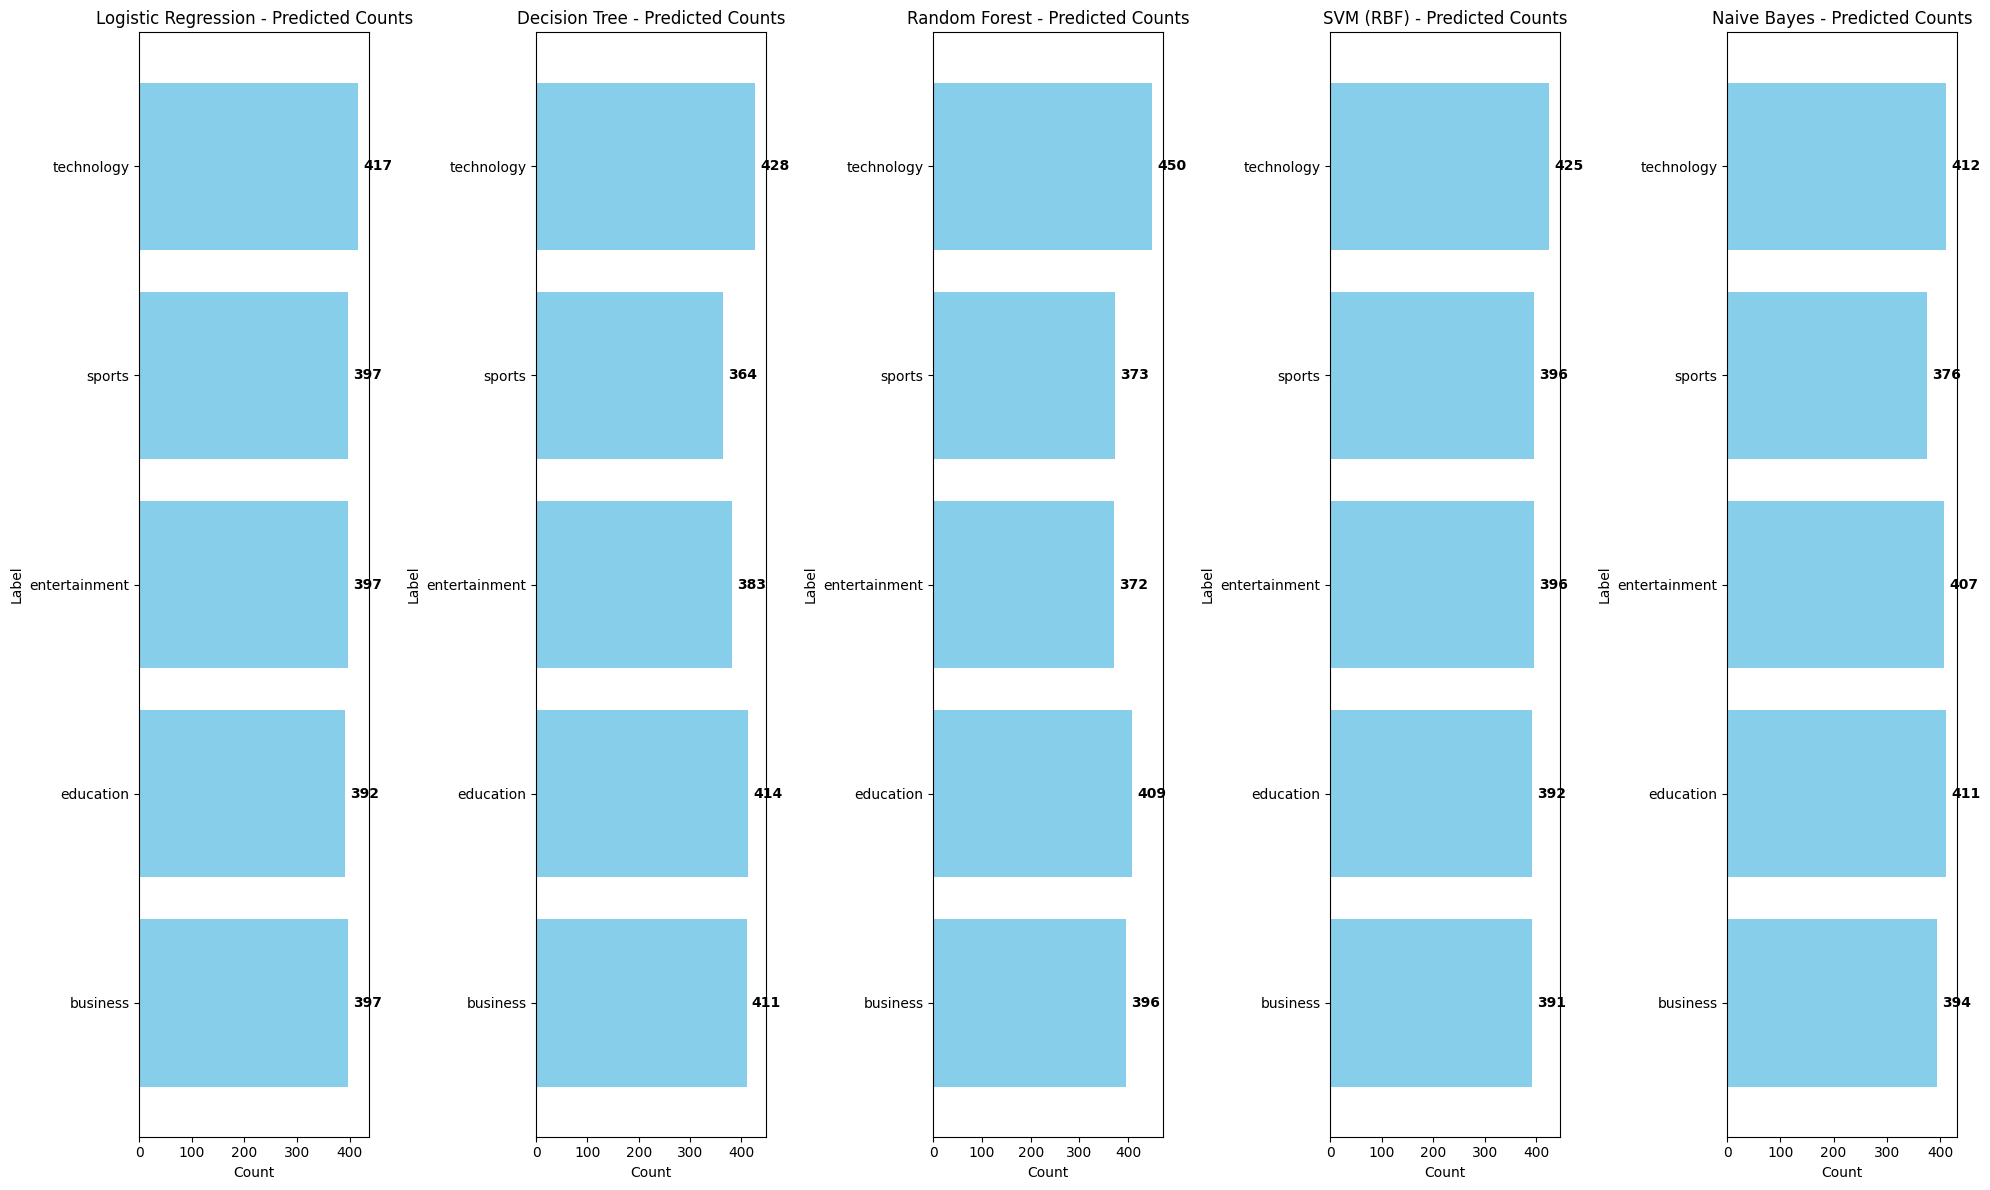

In [54]:
# Confusion matrices for each model (each row represents true labels and each column predicted labels)
conf_matrices = {
    'Logistic Regression': np.array([
        [385, 0, 1, 0, 14],
        [3, 392, 0, 0, 5],
        [1, 0, 395, 1, 3],
        [0, 0, 1, 394, 5],
        [8, 0, 0, 2, 390]
    ]),
    'Decision Tree': np.array([
        [344, 14, 1, 8, 33],
        [13, 374, 0, 8, 5],
        [5, 1, 371, 4, 19],
        [18, 7, 4, 333, 38],
        [31, 18, 7, 11, 333]
    ]),
    'Random Forest': np.array([
        [375, 5, 1, 0, 19],
        [3, 394, 0, 0, 3],
        [0, 1, 371, 1, 27],
        [3, 8, 0, 369, 20],
        [15, 1, 0, 3, 381]
    ]),
    'SVM (RBF)': np.array([
        [382, 0, 1, 0, 17],
        [2, 392, 0, 0, 6],
        [0, 0, 395, 1, 4],
        [0, 0, 0, 393, 7],
        [7, 0, 0, 2, 391]
    ]),
    'Naive Bayes': np.array([
        [382, 2, 1, 0, 15],
        [1, 396, 0, 0, 3],
        [0, 0, 396, 1, 3],
        [0, 9, 9, 374, 8],
        [11, 4, 1, 1, 383]
    ])
}

# Labels for the classes
labels = ['business', 'education', 'entertainment', 'sports', 'technology']

# Plotting the subplots
fig, axes = plt.subplots(1, 5, figsize=(20, 12))  # Increase the size of the subplots

# Loop through each model and plot a bar chart for the number of predictions per label
for i, (model, cm) in enumerate(conf_matrices.items()):
    # Sum the values of each column to get how many times each label was predicted
    predicted_counts = cm.sum(axis=0)
    
    # Plot the horizontal bar chart
    axes[i].barh(labels, predicted_counts, color='skyblue')
    axes[i].set_title(f'{model} - Predicted Counts')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Label')
    
    # Add the values on top of each bar
    for j, v in enumerate(predicted_counts):
        axes[i].text(v + 10, j, str(v), va='center', ha='left', fontweight='bold')

plt.tight_layout()
plt.savefig('label_classifier.jpg')
plt.show()

In [55]:
# Sum the predicted counts for each label across all classifiers
total_predicted_counts = np.zeros(len(labels))

for cm in conf_matrices.values():
    total_predicted_counts += cm.sum(axis=0)

# Find the most and least classified labels
most_classified_label = labels[np.argmax(total_predicted_counts)]
least_classified_label = labels[np.argmin(total_predicted_counts)]

# Output the results
most_classified_label, total_predicted_counts[np.argmax(total_predicted_counts)], \
least_classified_label, total_predicted_counts[np.argmin(total_predicted_counts)]

('technology', np.float64(2132.0), 'sports', np.float64(1906.0))

We plotted the counts for each label classified by each classification model. We wanted to see which labels/categories were classified the most/least across all the models. The 'Technology' category was classified the most across all models and the 'Sports' category was classified the least across all models. If Technology is overrepresented in the dataset, models might be biased toward predicting it more. If Sports is underrepresented, the models might struggle to learn its distinct features.
For better classification balance, using techniques like class weighting or oversampling (SMOTE) may help.

## 7. Conclusion & Insights

- From the EDA, we that Education is the most dominant category, with over 1400 articles, while Sports is the least represented (<800 articles). This imbalance may affect classification performance, as models tend to favor more frequent categories. Although, in the actual model performance, we saw that Technology was the most classified across all the classifiers.
- Article length is right-skewed, with shorter articles being the most common. Education articles are the longest, often exceeding 8000 words, while Sports articles are the shortest, mostly below 2000 words.
- The imbalance in article distribution suggests that models might be biased toward predicting Technology and Education while struggling with underrepresented categories like Sports.
- The Logistic Regression and SVM (RBF) performed best across all metrics in both the pipeline and cross-validation, achieving accuracy scores of 0.98+.
- Naïve Bayes was also a strong contender, with an accuracy of 0.97, making it a viable choice when prioritizing efficiency.
- Decision Tree was the weakest model, with an accuracy of 0.88 (pipeline) and 0.8757 (cross-validation), significantly lower than other models.
- In terms of computational efficiency, Naïve Bayes was the fastest model in both setups, taking 0.92s in the pipeline and 12.06s in cross-validation, making it an ideal choice for real-time applications.
- SVM had the worst runtime, requiring 52.27s in the pipeline and a staggering 514.15s in cross-validation, making it impractical for large-scale deployment.
- Cross-validation results closely aligned with pipeline results, confirming the stability and reliability of the classifier models.
- Random Forest showed a slight improvement in cross-validation (0.94 → 0.9585 accuracy), suggesting that it generalizes well with more data exposure.
- SVM maintained high accuracy but had a significant increase in runtime, highlighting its inefficiency in large-scale scenarios.
- Logistic Regression's performance remained stable during cross-validation, making it the best balance between accuracy and efficiency. This makes the Logistic Regression model the **best overall model** for efficiency and large-scale deployment.
- Technology was the most frequently classified category, aligning with its strong presence in the dataset.
- Sports was the least classified, reflecting its lower representation and potential difficulty in classification.
- Naïve Bayes had slightly lower precision for some categories (e.g., Sports), possibly due to its strong reliance on word frequency, which can be impacted by class imbalance.
- Decision Tree misclassified more instances than other models, suggesting its lower robustness.
- To improve the model performance across all the classifiers, we need to do some class balance distribution through oversampling or weighting to improve classification performance, especially for underrepresented categories like Sports.
- We would also need to do some hyperparameter tuning for the models to perform better. We can look into hyperparameter techiques such as Grid Search.

## 8. References

The training and test dataset comes from the [2401PTDS_Classification_Project](https://github.com/Jana-Liebenberg/2401PTDS_Classification_Project/tree/main) project repo.